## Observations and Insights 

In [40]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

## why can't i string all these replaces together?
# Reformat column headers
df = df.rename(
    columns=lambda header_str: header_str.lower()
    .replace(" ", "_")
    .replace(")", "")
    .replace("(", "")
)

# df["mouseid"] = df["mouse_id"]

# Display the data table for preview
# df.head()
df.shape

(1893, 8)

In [64]:
# Checking the number of mice.
# id_count = df["mouse_id"].value_counts()

# id_count = id_count.filter(items = "1", axis = 1)
# print(id_count)

# df["id_count"] = id_count
# print(id_count)

# df.head()

# lst = []

# def count_function(i):
#     for i in df["id_count"]:
#         if i == 1:
#             lst.append(df["mouse_id"])
#     return lst

# data = [[count_function(i)] for i in df]
# # data.head()
# print(data)


##why is one column header higher than the others? 

# get only the columns i need
df_count = df[["mouse_id", "timepoint", "drug_regimen"]]
# print(df_count)
df_count2 = df_count.groupby(by=["mouse_id", "timepoint"]).count()
df_count2
# print(df_count2)
# print(df_count2.dtypes)
# df[df["drug_regimen"] == 5]

drug_regimen
mouse_id timepoint              
a203     0                     1
         5                     1
         10                    1
         15                    1
         20                    1
...                          ...
z969     25                    1
         30                    1
         35                    1
         40                    1
         45                    1

[1888 rows x 1 columns]

In [68]:
df.head()

count_list = []

for 

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [97]:
# get only the columns i need
df_count = df[["mouse_id", "timepoint", "drug_regimen"]]
# print(df_count)
df_count2 = df_count.groupby(by=["mouse_id", "timepoint"]).count()
df_count2

df_count3 = (
    df_count.groupby(by=["mouse_id", "timepoint"])["drug_regimen"]
    .count()
    .reset_index(name="count")
)
# print(df_count3)
print(df.shape)
print(df_count3.shape)

df_maybe = pd.merge(df, df_count3, on="mouse_id", how="left")
# df_maybe = df_maybe.drop_duplicates()
print(df_maybe.shape)
# df_maybe["count"].sum()

(1893, 8)
(1888, 3)
(16728, 10)


In [140]:
# get only the columns i need
df_count = df[["mouse_id", "timepoint"]]
# print(df_count)
df_nodupes = df.drop_duplicates()
# print(df_nodupes.shape)

df_count3 = (
    df_count.groupby(by=["mouse_id", "timepoint"])["mouse_id"]
    .count()
    .reset_index(name="count")
)
# print(df_count3)

df = df.drop_duplicates()

# print(df.shape)
# print(df_count3.shape)
# print(df_count3)
# print(df_count3["count"].sum())

df_maybe = pd.merge(df_count3, df, on="mouse_id", how="inner")
# df_maybe = df_maybe.drop_duplicates()
# print(df_maybe.shape)
# print(df_maybe)
# df_maybe["count"].sum()
# pd.set_option("display.max_rows", 100)
# print(df_maybe.iloc[5346, :])
# df_maybe[df_maybe["mouse_id"] == "g989"].sort_values(
#     by=["count", "timepoint_x", "tumor_volume_mm3"]
# )
# df_maybe[df_maybe["count"] > 1]
df_maybe[df_maybe["mouse_id"] == "g989"].sort_values(by="timepoint_x")

,mouse_id,timepoint_x,count,drug_regimen,sex,age_months,weight_g,timepoint_y,tumor_volume_mm3,metastatic_sites
5334,g989,0,1,Propriva,Female,21,26,0,45.000000,0
5345,g989,0,1,Propriva,Female,21,26,35,62.570880,2
5344,g989,0,1,Propriva,Female,21,26,30,59.082294,1
5343,g989,0,1,Propriva,Female,21,26,25,56.045564,1
5341,g989,0,1,Propriva,Female,21,26,20,55.326122,1
5340,g989,0,1,Propriva,Female,21,26,15,53.442020,0
5342,g989,0,1,Propriva,Female,21,26,20,54.657650,1
5338,g989,0,1,Propriva,Female,21,26,10,49.880528,0
5337,g989,0,1,Propriva,Female,21,26,10,51.745156,0
5336,g989,0,1,Propriva,Female,21,26,5,47.570392,0


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# counts = df.groupby(["mouse_id", "timepoint"]).rank()

# df2 = df
# df2["id_count"] = counts["drug_regimen"]
# print(df2)

# df.head()
# df_rank = df.groupby(["mouse_id", "timepoint"]).count()
# df_rank.head()
# df_rank = df["drug_regimen"].rank()
# df_rank.head()




# counts.head()
# df.shape
# df.head()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


In [75]:
df.head()

df3 = df_count.groupby(by=["mouse_id", "timepoint"]).sum()

print(df.shape)
print(df3.shape)

(1893, 8)
(1888, 1)


## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


# Get only the data I need for this
df_regimen = df[["drug_regimen", "tumor_volume_mm3"]]
# print(df_regimen)

# how many regimens? 
regimen_count = len(df_regimen["drug_regimen"].unique())
# print(f"There are {regimen_count} regimens")

# get the mean
regimen_mean = df_regimen.groupby(by = ["drug_regimen"]).mean()
# print(regimen_mean.shape)

# get the median
regimen_median = df_regimen.groupby(by = ["drug_regimen"]).median()
# print(regimen_median.shape)

# get the variance
regimen_variance = df_regimen.groupby(by = ["drug_regimen"]).var()
# print(regimen_variance.shape)

# get the standard deviation
regimen_standdev = df_regimen.groupby(by = ["drug_regimen"]).std()
# print(regimen_standdev.shape)

# get the SEM
regimen_sem = df_regimen.groupby(by = ["drug_regimen"]).sem()
# print(regimen_sem.shape)

##why am i getting this error? it worked just fine with HeroesOfPymoli
# put them all together
pd.DataFrame(
    {
        "Mean": regimen_mean,
        "Median": regimen_median,
        "Variance": regimen_variance,
        "Standard Deviation": regimen_standdev,
        "SEM": regimen_sem,
    }
)

ValueError: If using all scalar values, you must pass an index

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Get only the data I need for this
##original
df_regimen = df[["drug_regimen", "tumor_volume_mm3"]]
# print(df_regimen.dtypes)

##attempt 1 to fix
# df_regimen = df[["drug_regimen", pd.to_numeric("tumor_volume_mm3")]]
# print(df_regimen.dtypes)

##attempt 2 to fix
# df_regimen = pd.to_numeric(df_regimen["tumor_volume_mm3"])
# print(df_regimen)

##I need to convert the volumn to numeric I think, but how?
# get the summary data
regimen_summary = df_regimen.groupby(by = ["drug_regimen"]).mean().median().var().std().sem()

# print(regimen_summary)


In [9]:
df.head()

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites,id_count
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



ValueError: `bins` must increase monotonically, when an array

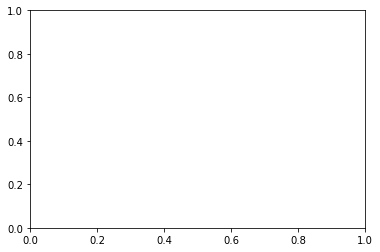

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.hist(df["timepoint"], df["timepoint"])
plt.showplot

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(df["timepoint"], df["tumor_volume_mm3"])
plt.show

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
